compare_tfidf_bm25.ipynb

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pastikan file ini ada di folder yang sama dengan notebook
RESULTS_PATH = "results_tfidf_bm25.json"

with open(RESULTS_PATH, "r", encoding="utf-8") as f:
    results = json.load(f)

results.keys(), results["TF-IDF"].keys(), results["BM25"].keys()

(dict_keys(['TF-IDF', 'BM25']),
 dict_keys(['method', 'MAP', 'per_query']),
 dict_keys(['method', 'MAP', 'per_query']))

Cell 3 – Ubah per query jadi DataFrame

In [3]:
tfidf_detail = results["TF-IDF"]["per_query"]
bm25_detail  = results["BM25"]["per_query"]

rows = []

for item in tfidf_detail:
    rows.append({
        "Query": item["query"],
        "Method": "TF-IDF",
        "AP": item["AP"],
        "P@5": item["P@5"],
        "P@10": item["P@10"],
    })

for item in bm25_detail:
    rows.append({
        "Query": item["query"],
        "Method": "BM25",
        "AP": item["AP"],
        "P@5": item["P@5"],
        "P@10": item["P@10"],
    })

df = pd.DataFrame(rows)
df

,Query,Method,AP,P@5,P@10
0,persib bandung,TF-IDF,1.000000,1.0,0.5
1,persija jakarta,TF-IDF,1.000000,1.0,0.5
2,arema fc,TF-IDF,0.911111,0.8,0.5
3,persebaya surabaya,TF-IDF,1.000000,1.0,0.5
4,jadwal bri liga 1 hari ini,TF-IDF,0.800000,0.8,0.4
5,persib bandung,BM25,0.925000,0.8,0.5
6,persija jakarta,BM25,0.627778,0.6,0.5
7,arema fc,BM25,1.000000,1.0,0.5
8,persebaya surabaya,BM25,1.000000,1.0,0.5
9,jadwal bri liga 1 hari ini,BM25,0.246667,0.4,0.3


Cell 4 – Pivot biar gampang dibandingkan per query

In [4]:
pivot_ap = df.pivot(index="Query", columns="Method", values="AP")
pivot_p5 = df.pivot(index="Query", columns="Method", values="P@5")
pivot_p10 = df.pivot(index="Query", columns="Method", values="P@10")

print("=== Average Precision (AP) per Query ===")
display(pivot_ap)

print("\n=== Precision@5 per Query ===")
display(pivot_p5)

print("\n=== Precision@10 per Query ===")
display(pivot_p10)

=== Average Precision (AP) per Query ===


Method,BM25,TF-IDF
Query,,
arema fc,1.000000,0.911111
jadwal bri liga 1 hari ini,0.246667,0.800000
persebaya surabaya,1.000000,1.000000
persib bandung,0.925000,1.000000
persija jakarta,0.627778,1.000000



=== Precision@5 per Query ===


Method,BM25,TF-IDF
Query,,
arema fc,1.0,0.8
jadwal bri liga 1 hari ini,0.4,0.8
persebaya surabaya,1.0,1.0
persib bandung,0.8,1.0
persija jakarta,0.6,1.0



=== Precision@10 per Query ===


Method,BM25,TF-IDF
Query,,
arema fc,0.5,0.5
jadwal bri liga 1 hari ini,0.3,0.4
persebaya surabaya,0.5,0.5
persib bandung,0.5,0.5
persija jakarta,0.5,0.5


Cell 5 – Grafik MAP TF-IDF vs BM25

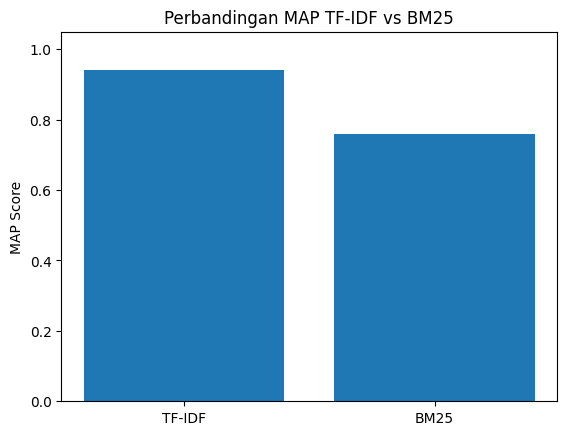

MAP TF-IDF: 0.9422222222222223
MAP BM25 : 0.7598888888888888


In [5]:
methods = ["TF-IDF", "BM25"]
maps = [results["TF-IDF"]["MAP"], results["BM25"]["MAP"]]

plt.figure()
plt.bar(methods, maps)
plt.title("Perbandingan MAP TF-IDF vs BM25")
plt.ylabel("MAP Score")
plt.ylim(0, 1.05)
plt.show()

print("MAP TF-IDF:", results["TF-IDF"]["MAP"])
print("MAP BM25 :", results["BM25"]["MAP"])

Cell 6 – Grafik AP per query (opsional tapi bagus buat laporan)

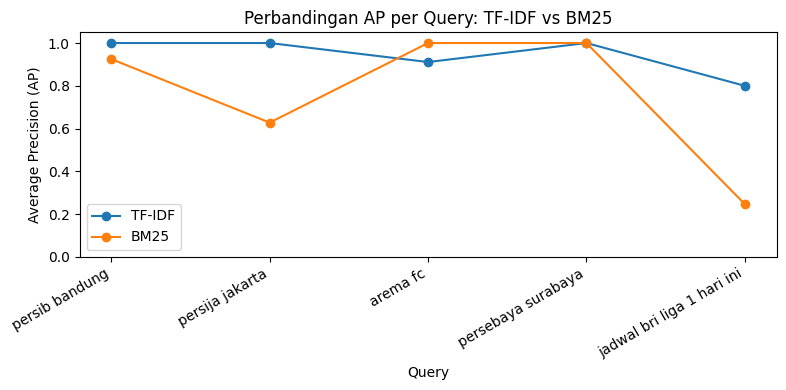

In [6]:
plt.figure(figsize=(8, 4))

for method in ["TF-IDF", "BM25"]:
    subset = df[df["Method"] == method].set_index("Query")
    plt.plot(subset.index, subset["AP"], marker="o", label=method)

plt.title("Perbandingan AP per Query: TF-IDF vs BM25")
plt.xlabel("Query")
plt.ylabel("Average Precision (AP)")
plt.xticks(rotation=30, ha="right")
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()